# Assignment 2
## Stance Classsification
#### Student 1 Name: Varshini Onbatuveli Kishorekumar
##### Student 1 ID: s3777362
#### Student 2 Name: Sri Sainee Thirumurugan
##### Student 2 ID: s3774307

### Introduction
Most social media analysis involve analysing and classififying Twitter tweets. Sentiment analysis is the classification task to determine if the given text, in our case a tweet, is positive, negative or neutral. It is used to understand the opinion of the author of that piece text or tweet. Sentiment analysis can be used for public opinion polling and recomendation systems. Stance classification is the task of classifying the tweet based on whether the tweet is For or Against a given target topic. It is independent of the opinion (positive/negative) of that text. Stance classsification can be used for information retrieval, text
summarization, and textual entailment applications. 


### Extracting and Importing Train and Test Data

In [40]:
import zipfile
with zipfile.ZipFile("./StanceDataset.zip") as zip_ref:
    zip_ref.extractall()

In [41]:
import pandas as pd

# import train data
train_data = pd.read_csv("./StanceDataset/train.csv", engine='python')
train_data

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,"@tedcruz And, #HandOverTheServer she wiped cle...",Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,Hillary is our best choice if we truly want to...,Hillary Clinton,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,@TheView I think our country is ready for a fe...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,I just gave an unhealthy amount of my hard-ear...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@PortiaABoulger Thank you for adding me to you...,Hillary Clinton,NONE,3. The tweet is not explicitly expressing opi...,pos
...,...,...,...,...,...
2909,"There's a law protecting unborn eagles, but no...",Legalization of Abortion,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
2910,I am 1 in 3... I have had an abortion #Abortio...,Legalization of Abortion,AGAINST,2. The tweet does NOT expresses opinion about ...,other
2911,How dare you say my sexual preference is a cho...,Legalization of Abortion,AGAINST,2. The tweet does NOT expresses opinion about ...,neg
2912,"Equal rights for those 'born that way', no rig...",Legalization of Abortion,AGAINST,2. The tweet does NOT expresses opinion about ...,neg


In [42]:
# import train data
test_data = pd.read_csv("./StanceDataset/test.csv", engine='python')
test_data

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,He who exalts himself shall be humbled; a...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
1,RT @prayerbullets: I remove Nehushtan -previou...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,other
2,@Brainman365 @heidtjj @BenjaminLives I have so...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
3,#God is utterly powerless without Human interv...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@David_Cameron Miracles of #Multiculturalism...,Atheism,AGAINST,2. The tweet does NOT expresses opinion about ...,neg
...,...,...,...,...,...
1951,@realDonaldTrump we all want you as the next p...,Donald Trump,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
1952,@RSherman_25 Join Twitter Trump brigade #oneth...,Donald Trump,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
1953,@JoeyBats19 Join Twitter Trump brigade #onetho...,Donald Trump,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
1954,Trump's outlandish statements is political str...,Donald Trump,AGAINST,1. The tweet explicitly expresses opinion abo...,neg


### Data Analysis

The test data has an extra Target feature Donald Trump that is not present in the train data and hence is removed

In [43]:
test_data.drop(test_data.loc[test_data['Target']=="Donald Trump"].index, inplace=True)

To understand how the given tweet texts are, a sample of 5 tweets are taken out of the train dataset

In [44]:
train_data['Tweet'].sample(5)

2679    What about the equal rights of unborn humans i...
732     Did u know th #SCOTUS is 2 Decide If #Coal Pla...
871     As the world emitted CO2 water vapour built up...
1903    @HillaryClinton @ca_hillary stand on the right...
546     Maher is  a comedian and nothing more. And unf...
Name: Tweet, dtype: object

It can be observed that each tweet text has variable lenght with punctuations, hastags, mentions which can be removed during the preprocessing step.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

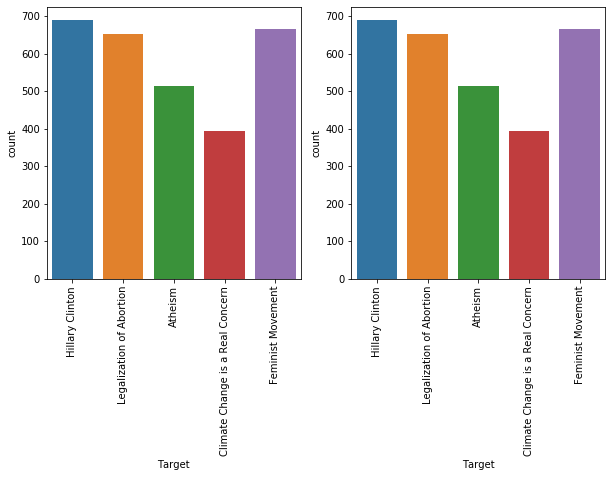

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))

plt.subplot(121)
sns.countplot(train_data['Target'])
plt.xticks(rotation=90)
plt.subplot(122)
sns.countplot(train_data['Target'])
plt.xticks(rotation=90)

It can be observed that the Target in both train and test data are identically distributed. But the distribution among the Targets are not balanced. 

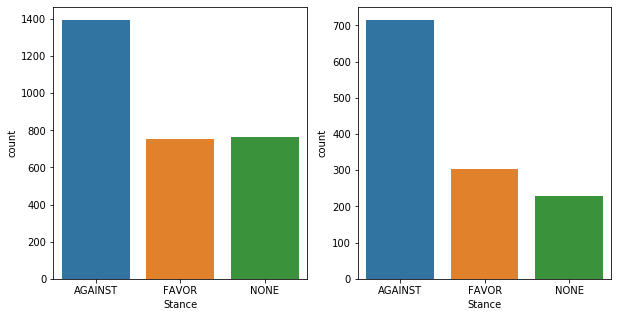

In [46]:
fig = plt.figure(figsize=(10,5))

plt.subplot(121)
sns.countplot(train_data['Stance'])
plt.subplot(122)
sns.countplot(test_data['Stance'])

The class label is the Stance feature in the dataset. The barcharts above show that there is a class imbalance problem in the both train and the test dataset.  

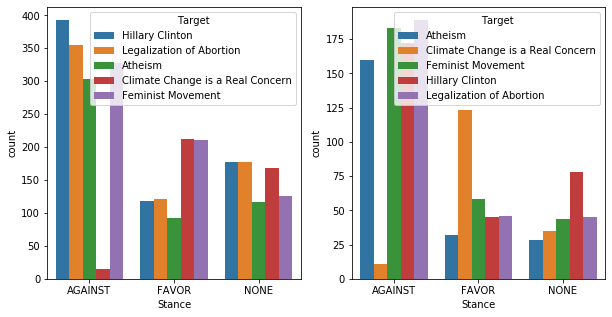

In [47]:
fig = plt.figure(figsize=(10,5))

plt.subplot(121)
sns.countplot(train_data['Stance'], hue = train_data['Target'])
plt.subplot(122)
sns.countplot(test_data['Stance'], hue = test_data['Target'])

From the graphs above, a general idea of the distribution of the Target and Stance can be observed. There is a clear imbalance in the distribution of the Target and Stance and each Stance has an unever Target distribution. But it can be noted that Climate Change target topic has very little negative (Against) attitude and most positive (for) attitude. There are many tweets in the dataset that are against most of the topics.

In [48]:
from collections import Counter
most_common_words = Counter(" ".join(train_data["Tweet"]).split()).most_common(100)
most_common_words

[('#SemST', 2814),
 ('the', 1378),
 ('to', 1187),
 ('a', 856),
 ('of', 795),
 ('is', 749),
 ('and', 589),
 ('I', 549),
 ('in', 547),
 ('for', 528),
 ('you', 485),
 ('be', 370),
 ('that', 311),
 ('are', 304),
 ('on', 301),
 ('not', 271),
 ('have', 231),
 ('with', 216),
 ('it', 213),
 ('my', 201),
 ('&', 188),
 ('your', 180),
 ('we', 179),
 ('as', 167),
 ('will', 162),
 ('about', 156),
 ('The', 154),
 ('this', 153),
 ("don't", 140),
 ('can', 135),
 ('all', 134),
 ('but', 132),
 ('who', 127),
 ('at', 125),
 ('they', 125),
 ('RT', 118),
 ('me', 117),
 ('like', 115),
 ('if', 113),
 ('just', 113),
 ('their', 113),
 ('or', 111),
 ('so', 111),
 ("I'm", 110),
 ('do', 110),
 ('@HillaryClinton', 109),
 ('by', 109),
 ('people', 109),
 ('what', 105),
 ('has', 103),
 ('women', 102),
 ('get', 101),
 ('an', 100),
 ('from', 99),
 ('her', 98),
 ('more', 98),
 ('If', 97),
 ('when', 95),
 ('want', 94),
 ('-', 92),
 ('You', 92),
 ('no', 92),
 ('our', 90),
 ('how', 90),
 ('Hillary', 88),
 ('out', 85),
 ('up

Just out of curiosity, the most commonly used 100 words were extracted. The train data has 2914 tweets. The most commonly occuring word is the hastage #SemST. The other most commonly occuring words are the English stopwords. Therefore in the preprocessing step, the #SemST and the stop words will be removed. The most commonly occuring words without the stopwords are as follows:

In [49]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
import string
from nltk.corpus import stopwords
for word in most_common_words:
    if word[0].lower() not in stopwords.words('english') and word[0].lower() not in string.punctuation:
        print(word[0])

#SemST
RT
like
I'm
@HillaryClinton
people
women
get
want
Hillary
know
need
right
one
would
can't
make
God
think
men
life
us
time
#GamerGate
going
love
abortion


In [51]:
# extract hashtags
hashes = [word for word in "".join(train_data["Tweet"]).split() if "#" in word]
hashes

['#HandOverTheServer',
 '#Benghazi,etc',
 '#tcotHillary',
 '#Ohio@TheView',
 '#WhyImNotVotingForHillary@PortiaABoulger',
 '#Warren2016Respect',
 '#BaltimoreRiotsI',
 'post.#StopHillary2016',
 '#ClintonFoundation.',
 '#Benghazi.',
 '#Arrest',
 '#BillClinton.',
 '#HillaryClintonUse',
 '#ClintonFoundationscandal',
 '#ClintonCash@readyforHRC',
 '#HillaryClinton,',
 '#women',
 '#WhyImNotVotingForHillary@lindasuhler',
 '#Democrats',
 '#2016',
 '#Clinton2016@HomeOfUncleSam',
 '#NoHillary',
 '#WhyImNotVotingForHillary@HillaryClinton',
 'Spun!#Hillary',
 '#pizza',
 '#Italian',
 '#MSM',
 '#libertynothillary',
 '#HillNoI',
 '#WhyImNotVotingForHillaryMarch',
 '#Ohio',
 '#OurChampion@RIGHTZONE',
 '#HillNoHillary',
 '#clintonfakerealityshow@NaughtyBeyotch',
 '#Fiorina,',
 '#sexist',
 '#media.',
 '#MSM@FoxNews',
 '#NoHillary2016@HillaryClinton',
 '#global',
 '#moral_humane',
 'RT#Hillary',
 '#LibertyNotHillary@WSJ',
 '#WhyImNotVotingForHillary@josephbenning',
 '#WakeUpAmerica',
 '#ThatChampion',
 '#W

In [52]:
# find total number of #s
print(len(hashes))

6274


There are 6274 hastags in the train dataset which will later be preprocessed. For instance, #WhyImNotVotingForHillary can be split into 'Why Im Not Voting For Hillary' which could make the model understand and predict the stance of that tweet. From the hastage alone, it can be detected that the stance is Against and the Target is Hillary. #environment indicates that the tweet is about the target Climate Change and #God might be about Aethism. Therefore by splitting the hastages by words and removing the # symbol, it might be easier to learn the Stance and the Target and hence is done at the preprocessing step.

In [53]:
hashes = pd.DataFrame(hashes)
hashes[0].value_counts()

#SemSTI              133
#SemSTRT              98
#SemSTThe             77
#SemSTIf              64
#GamerGate            56
                    ... 
#CambioClimtico        1
#RedState              1
#NYCPride              1
#SemSTMeme             1
#BaylorUniversity      1
Name: 0, Length: 3705, dtype: int64

After attempting to find the most commonly used hashtag, it can be observed that #SemSTI, #SemSTRT, #SemSTThe , #SemSTIf are some varients of the #SemST and therefore can be concluded to remove them while preprocessing

### Data Preprocessing
    

To understand how the tweets were before and after the preprocessing, a random 5 tweets are chosen to see the before and after effects

In [54]:
print("before")
print(train_data.iloc[2909, 0])
print(train_data.iloc[2580, 0])
print(train_data.iloc[664, 0])
print(train_data.iloc[636, 0])
print(train_data.iloc[887, 0])

before
There's a law protecting unborn eagles, but not  humans uh, idk if you've noticed, but there aren't 7 billion eagles around. #SemST
@bethanyshondark do you mean Bristol? She was just being honest about her feelings - many can relate - hope they choose life too! #SemST
What a great week for social issues #SCOTUS Now, let's get to work on #environment and #SemST
Isn't CO2 impact on warming logarithmic, and at current levels, 390 ppm, incremental impact negligible? #NDP #SemST
#Mission:#Climate @ home > Simplify (by @BeZeroWaste) #Tip #DoYourPart #SemST


The preprocessing of tweets include the following steps:
+ Removing mentions
+ Removing numbers
+ Removing urls
+ Removing punctuations
    - since they do not add meaning to the text
+ Converting all characters to lower case 
    - to maintain uniformity and enable better and easy learning
+ Splitting long hashtags to single words
+ Removing # from hashtags
    - to get more meaning and information about text
+ Stemming using Porter Stemmer
    - to extract root words 
    - common text preporcessing step to normalize data
    - reduces vocabulary size
+ Removing stopwords
    - to improve performace by only retaining fewer and meaningful words

In [55]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# splitting long hashtags
def split_hashtage(hashtagestring):
    # remove the # in #hashtag
    hashtagestring = re.sub(r'#([^\s]+)', r'\1', hashtagestring)
    fo = re.compile(r'#[A-Z][a-z]{2,}(?![a-z])|[A-Z][a-z]+')
    fi = fo.findall(hashtagestring)
    # splitting long hashtags
    if(fi):
        result = ''
        for var in fi:
            result += var + ' '
        return result 
    else:
        return hashtagestring

# Stemming tweets to extract root words using Porter Stemmer
def stem_texts(sentence):
    text = word_tokenize(sentence) 
    ps = PorterStemmer()
    stemmed_sentence = ''
    for word in text:
        stemmed_sentence += " " + ps.stem(word)
    return stemmed_sentence
    
    
def preprocess_tweet(text):
    
    # removing mentions
    text = re.sub('@[A-Za-z0-9]+', '', text) 
    
    # splitting the hashtags
    words = text.split()
    for word in words:
        if('#' in word and "SemST" not in word):
            text = text.replace(word, split_hashtage(word))

    # converting to lowercase
    text = text.lower()

    # removing urls
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text)
    text = re.sub(r'http\S+', ' ', text)

    # removing punctuations
    text = [char for char in text if char not in string.punctuation]
    text = ''.join(text)
    
    # removing numbers
    text = re.sub('\w*\d\w*', '', text)
    
    # extracting rootwords using Stemming 
    text = stem_texts(text) 
    
    #remove stopwords from final word list
    text = word_tokenize(text)   
    return [word for word in text if word not in stopwords.words('english') and "semst" not in word and word!='rt']

# preprocess train data 
for i in range(0,len(train_data)):
    train_data.iloc[i, 0] = preprocess_tweet(train_data.iloc[i, 0])
   

In [56]:
# preprocess train data 
for i in range(0,len(test_data)):
    test_data.iloc[i, 0] = preprocess_tweet(test_data.iloc[i, 0])

In [57]:
print("after")
print(train_data.iloc[2909, 0])
print(train_data.iloc[2580, 0])
print(train_data.iloc[664, 0])
print(train_data.iloc[636, 0])
print(train_data.iloc[887, 0])

after
['law', 'protect', 'unborn', 'eagl', 'human', 'uh', 'idk', 'youv', 'notic', 'arent', 'billion', 'eagl', 'around']
['mean', 'bristol', 'wa', 'honest', 'feel', 'mani', 'relat', 'hope', 'choos', 'life']
['great', 'week', 'social', 'issu', 'scotu', 'let', 'get', 'work', 'environ']
['isnt', 'impact', 'warm', 'logarithm', 'current', 'level', 'ppm', 'increment', 'impact', 'neglig', 'ndp']
['mission', 'climat', 'home', 'simplifi', 'tip', 'part']


On comparing the tweets before and after the preprocessing, we can see that the #environment and #DoYouPart became to environ and part respectively after removing and preprocessing #s and stopwords and stemmibg

### Data Preparation

To prepare the dataset to feed it to the model, the stance class label which is a category should be encoded into numbers

In [58]:
encode = {
    "AGAINST" : 0,
    "NONE"  : 1,       
    "FAVOR" : 2,    
}

train_data["Stance"] = train_data["Stance"].apply(lambda x: encode[x])
test_data["Stance"] = test_data["Stance"].apply(lambda x: encode[x])
train_data.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,"[hand, server, wipe, clean, delet, email, expl...",Hillary Clinton,0,1. The tweet explicitly expresses opinion abo...,neg
1,"[hillari, best, choic, truli, want, continu, p...",Hillary Clinton,2,1. The tweet explicitly expresses opinion abo...,pos
2,"[think, countri, readi, femal, pre, cant, ever...",Hillary Clinton,0,1. The tweet explicitly expresses opinion abo...,neg
3,"[gave, unhealthi, amount, hardearn, money, awa...",Hillary Clinton,0,1. The tweet explicitly expresses opinion abo...,neg
4,"[thank, ad, list]",Hillary Clinton,1,3. The tweet is not explicitly expressing opi...,pos


Next, a vocabulary of all the unique words in the Tweet column must be collected. The string text is first tokenised into words and the unique words in this data is extracted. The vocabulary of this data is the unique words plus one. The one extra vocabulary is for the words that are outside the set of unique words (OoV - Out of Vocabulary), which is the words that are unseen.  
The words are converted into numbers that correspond to the index of that word in that vocabulary.
The tweet and target are padded into equal lenghts.

In [59]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

tokenizer_obj = Tokenizer()

#Tokenizing tweet and target for train and test data
tokenizer_obj.fit_on_texts(train_data['Tweet'])
sequences_Tweet = tokenizer_obj.texts_to_sequences(train_data['Tweet'])
tokenizer_obj.fit_on_texts(train_data['Target'])
sequences_Target = tokenizer_obj.texts_to_sequences(train_data['Target'])

tokenizer_obj.fit_on_texts(test_data['Tweet'])
sequences_Test_Tweet = tokenizer_obj.texts_to_sequences(test_data['Tweet'])
tokenizer_obj.fit_on_texts(test_data['Target'])
sequences_Test_Target = tokenizer_obj.texts_to_sequences(test_data['Target'])

# unique words and vocabulary
word_index = tokenizer_obj.word_index
print("unique tokens - "+str(len(word_index)))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab_size - '+str(vocab_size))

# padding tweets and target to equal length
lines_pad_Tweet = pad_sequences(sequences_Tweet, padding='post')
lines_pad_Target = pad_sequences(sequences_Target, padding='post', maxlen = 20)
category_train =  train_data['Stance'].values

lines_pad_Test_Tweet = pad_sequences(sequences_Test_Tweet, padding='post', maxlen = 20)
lines_pad_Test_Target = pad_sequences(sequences_Test_Target, padding='post', maxlen = 20)
category_test =  test_data['Stance'].values

unique tokens - 7489
vocab_size - 7490


The following cells print the processed tweet, target and stance for train and test data

In [60]:
lines_pad_Tweet

array([[ 234,  827, 2584, ...,    0,    0,    0],
       [   1,   83,  103, ...,    0,    0,    0],
       [  34,  123,  176, ...,    0,    0,    0],
       ...,
       [ 995,   23,  327, ...,    0,    0,    0],
       [  16,    6,  389, ...,    0,    0,    0],
       [ 437, 5949,   72, ..., 1701,  394,    0]], dtype=int32)

In [61]:
lines_pad_Target

array([[3, 2, 0, ..., 0, 0, 0],
       [3, 2, 0, ..., 0, 0, 0],
       [3, 2, 0, ..., 0, 0, 0],
       ...,
       [5, 6, 7, ..., 0, 0, 0],
       [5, 6, 7, ..., 0, 0, 0],
       [5, 6, 7, ..., 0, 0, 0]], dtype=int32)

In [62]:
lines_pad_Test_Tweet

array([[2485,  488,  943, ...,    0,    0,    0],
       [ 910, 6137, 2997, ...,    0,    0,    0],
       [6138,  135,  553, ...,    0,    0,    0],
       ...,
       [  25, 1028,  353, ...,    0,    0,    0],
       [  70, 1189,  933, ...,    0,    0,    0],
       [ 757, 7489,  422, ...,    0,    0,    0]], dtype=int32)

In [63]:
lines_pad_Test_Target

array([[8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 6, 7, ..., 0, 0, 0],
       [5, 6, 7, ..., 0, 0, 0],
       [5, 6, 7, ..., 0, 0, 0]], dtype=int32)

In [64]:
sequences_Tweet

[[234, 827, 2584, 1089, 632, 122, 517, 2585, 2586, 213, 82],
 [1, 83, 103, 564, 15, 235, 376, 192, 1090],
 [34, 123, 176, 144, 1325, 35, 145, 1],
 [565, 2587, 1326, 2588, 214, 296, 263, 346, 2589, 2590, 18, 14, 37, 1],
 [54, 938, 939],
 [1, 33, 124, 720, 721, 125, 264, 13, 1091, 1091],
 [265, 113, 265, 113, 74, 21, 1327, 204, 321],
 [7, 15, 2591, 1328, 722],
 [50, 1, 49, 38, 1092, 1750, 42, 37, 38, 69],
 [133, 1751, 24, 476, 940, 1752, 213, 1093, 941, 236, 24, 1, 24],
 [92, 942, 89, 1, 237],
 [1, 1753, 1329, 24, 1754, 24, 943],
 [1, 24, 26, 69, 2592, 633, 3, 566, 31],
 [1755, 25, 14, 2],
 [249, 1756, 131, 322, 18, 14, 37, 1],
 [142, 2593, 1757, 1330, 2594, 1331],
 [182, 1758, 125, 226, 176, 634, 1, 1332],
 [944, 1759, 150, 7, 297, 151, 37, 377],
 [27, 135],
 [1, 84, 15, 160, 215, 1333, 945, 1094, 518, 216],
 [44, 55, 40, 1, 49, 1334, 1091, 1760, 2595, 2596, 49, 152, 24],
 [2597, 227, 266, 2598, 168, 635],
 [32, 946, 2599, 58, 1, 18, 14, 37, 1],
 [169,
  378,
  169,
  566,
  1095,
  3,


In [65]:
sequences_Target

[[3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [3, 2],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7],
 [5, 6, 7]

In [66]:
category_train

array([0, 2, 0, ..., 0, 0, 0])

In [67]:
category_test

array([0, 0, 0, ..., 0, 0, 0])

The prepared data now shuffled before training based on the indices of the tweet column

In [68]:
import numpy as np
indices = np.arange(lines_pad_Tweet.shape[0])
np.random.shuffle(indices)
lines_pad_Tweet = lines_pad_Tweet[indices]
lines_pad_Target = lines_pad_Target[indices]

X_train_Tweet = lines_pad_Tweet
X_train_Target = lines_pad_Target
y_train = category_train

X_test_Tweet = lines_pad_Test_Tweet
X_test_Target = lines_pad_Test_Target
y_test = category_test

Printing the train data

In [69]:
X_train_Tweet

array([[  23,    4,  157, ...,    0,    0,    0],
       [   9,  170,  144, ...,    0,    0,    0],
       [ 443, 3849,  362, ...,    0,    0,    0],
       ...,
       [ 402,   70,  199, ...,    0,    0,    0],
       [2326,  321, 4473, ...,    0,    0,    0],
       [  59, 1098, 2692, ...,    0,    0,    0]], dtype=int32)

In [70]:
X_train_Target

array([[ 5,  6,  7, ...,  0,  0,  0],
       [ 1,  4,  0, ...,  0,  0,  0],
       [11, 12, 13, ...,  0,  0,  0],
       ...,
       [ 1,  4,  0, ...,  0,  0,  0],
       [ 1,  4,  0, ...,  0,  0,  0],
       [ 8,  0,  0, ...,  0,  0,  0]], dtype=int32)

In [71]:
y_train

array([0, 2, 0, ..., 0, 0, 0])

Printing the dimensions of the train and test data. The train data will be further divided into train-validation split in the Cross validation.

In [72]:
print("Tweet Train shape- ", X_train_Tweet.shape)
print("Target Train shape- ", X_train_Target.shape)
print("Stance Train shape- ", y_train.shape)

print("Tweet Train shape- ", X_test_Tweet.shape)
print("Target Train shape- ", X_test_Target.shape)
print("Stance Train shape- ", y_test.shape)

Tweet Train shape-  (2914, 20)
Target Train shape-  (2914, 20)
Stance Train shape-  (2914,)
Tweet Train shape-  (1249, 20)
Target Train shape-  (1249, 20)
Stance Train shape-  (1249,)


### Model Building

GloVe pretrained word vector model is used as the Embedding model for this task. 100 dimension GloVe vector has been chosen because of the small size of the dataset. 

In [34]:
file = open('glove.6B.100d.txt', encoding='utf-8')

glove_vectors = dict()
for line in file:
    values = line.split()
    word = values[0]
    features = np.asarray(values[1:])
    glove_vectors[word] = features

file.close()

In [35]:
embedding_dim = 100
glove = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = glove_vectors.get(word)
    if embedding_vector is not None:
        glove[i] = embedding_vector

The architectre chosen to classifiy stance is adopted from Targetspecific Attentional Network (TAN) *Du, J., Xu, R., He, Y. and Gui, L., 2017, August. Stance classification with target-specific neural attention networks. International Joint Conferences on Artificial Intelligence.* 

This model architecture is chosen because of the relevant approach which focuses not only on the tweets but also at the target before classifying the stance. The concept, approach and model is not too complex and is easily replicable when compared to the other authors in the literature survey and also has good performance. The goal of this design is to come up with a model that has been trained well enough to achieve a macro average F1 score above 30%. 

The inputs are embedded with the Embedding layer initialized with the GloeVe model's weights. The output of the tweet embedding is sent to the bidirectional LSTM. The output of the target is fed to a Dense layer eith softmax activation. The 2 results are multiplied to implement the target specific attention extractor. The result of the attention layer is enoced again with a simple LSTM layer and finally the stance is classified with the softmax activation in the final dense layer. 

In [89]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, Attention, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Multiply
import keras

# Model Architecture
# tweet embedding
tweet = Input(shape=(20, ), name = 'tweet')
embedding_layer_Tweet = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[glove],
                            trainable=True)(tweet)
BiLSTM_Tweet = Bidirectional(LSTM(64))(embedding_layer_Tweet)

# target embedding
target = Input(shape=(20), name = 'target')
embedding_layer_Target = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[glove],
                            trainable=True)(target)
linear_softmax = Dense(128, activation='softmax')(embedding_layer_Target)

# concatinating both embeddings by mutliplication
concat = Multiply()([BiLSTM_Tweet, linear_softmax])

# final encoding before classification
BiLSTM_Tweet = LSTM(100)(concat)
output = Dense(3, activation='softmax')(BiLSTM_Tweet)


model = Model(inputs=[tweet, target], outputs= output)

print(model.summary())

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
tweet (InputLayer)              [(None, 20)]         0                                            
__________________________________________________________________________________________________
target (InputLayer)             [(None, 20)]         0                                            
__________________________________________________________________________________________________
embedding_16 (Embedding)        (None, 20, 100)      749000      tweet[0][0]                      
__________________________________________________________________________________________________
embedding_17 (Embedding)        (None, 20, 100)      749000      target[0][0]                     
____________________________________________________________________________________________

Following the literature review where the authors of various papers performed Cross Validation, and considereing the class imbalance problem, Stratified 5 Fold cross validation has been implemented. The model is trained for 5 epoch with 50 iterations each. The model is compiled with Adam optimizer. Decay policy for Adam is also applied which is not performed by any authors.

In [ ]:
# Defining and initializing constants
skf = StratifiedKFold(n_splits=5, shuffle=True)

INIT_LR = 0.001
EPOCHS = 50
BATCH_SIZE = 32
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

X_Tweet = X_train_Tweet
X_Target = X_train_Target
y = y_train
y = to_categorical(y, 3)

In [90]:
from keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold

# training model with cross validation
def stratifiedCV(model):
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

    for index, (train_indices, val_indices) in enumerate(skf.split(X_Tweet, y_train)):
        print ("Training on fold " + str(index+1) + "/5...")

        X_tweet_train, X_tweet_val = X_Tweet[train_indices], X_Tweet[val_indices]
        X_target_train, X_target_val = X_Target[train_indices], X_Target[val_indices]
        Y_train, Y_val = y[train_indices], y[val_indices]

        history = model.fit([X_tweet_train, X_target_train], Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                            validation_data=([X_tweet_val, X_target_val], Y_val), verbose=1)

    return history 
    
history = stratifiedCV(model)

Training on fold 1/5...
Train on 2331 samples, validate on 583 samples
Epoch 1/50
2331/2331 [==============================] - 13s 6ms/sample - loss: 1.0596 - categorical_accuracy: 0.4745 - val_loss: 1.0541 - val_categorical_accuracy: 0.4786
Epoch 2/50
2331/2331 [==============================] - 5s 2ms/sample - loss: 1.0589 - categorical_accuracy: 0.4788 - val_loss: 1.0562 - val_categorical_accuracy: 0.4786
Epoch 3/50
2331/2331 [==============================] - 5s 2ms/sample - loss: 1.0423 - categorical_accuracy: 0.4788 - val_loss: 1.0769 - val_categorical_accuracy: 0.4751
Epoch 4/50
2331/2331 [==============================] - 5s 2ms/sample - loss: 0.9340 - categorical_accuracy: 0.5311 - val_loss: 1.2729 - val_categorical_accuracy: 0.3962
Epoch 5/50
2331/2331 [==============================] - 5s 2ms/sample - loss: 0.7336 - categorical_accuracy: 0.6182 - val_loss: 1.3163 - val_categorical_accuracy: 0.3928
Epoch 6/50
2331/2331 [==============================] - 5s 2ms/sample - loss: 

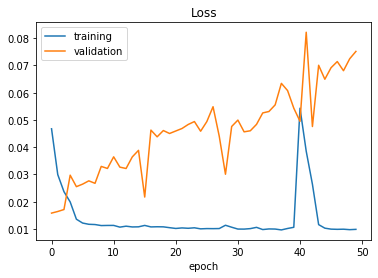

In [91]:
# plotting loss curves
def plot_curves(history):
    plt.plot(history.history['loss']) 
    plt.plot(history.history['val_loss']) 
    plt.legend(['training', 'validation']) 
    plt.title('Loss') 
    plt.xlabel('epoch')
plot_curves(history)

By analysing the loss curves of the model, it is evident that the model overfits the given data. With an exception for a few iterations after the 40th epoch the curve appears to be smooth which indicates that there is no problem with the learning rate. Therefore l2 regularizer is used in both the LSTM layers and a dropout of 0.4 is added after the second LSTM layer to redice the overfitting. 

In [93]:
from tensorflow.keras.models import model_from_json

# saving the model
def save_model(model, model_name):
    model_json = model.to_json()
    with open("{}.h5".format(model_name), "w") as json_file:
        json_file.write(model_json)
    model.save_weights("{}.h5".format(model_name))
    print("Saved model to disk")
    
save_model(model, "model")

### Incremental Changes
The model is trained with the modifications determined from the loss curves of each model after training. 

In [100]:
import tensorflow
from tensorflow.keras.layers import Dropout

# model architecture after adding regularizers and dropout

tweet = Input(shape=(20, ), name = 'tweet')
embedding_layer_Tweet = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[glove],
                            trainable=True)(tweet)
BiLSTM_Tweet = Bidirectional(LSTM(64, kernel_regularizer=tensorflow.keras.regularizers.l2(0.01)))(embedding_layer_Tweet)

target = Input(shape=(20), name = 'target')
embedding_layer_Target = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[glove],
                            trainable=True)(target)
linear_softmax = Dense(128, activation='softmax')(embedding_layer_Target)

concat = Multiply()([BiLSTM_Tweet, linear_softmax])

LSTM_attention = LSTM(100, kernel_regularizer=tensorflow.keras.regularizers.l1(0.01))(concat)
dropout = Dropout(0.4)(LSTM_attention)
output = Dense(3, activation='softmax')(dropout)

model = Model(inputs=[tweet, target], outputs= output)

print(model.summary())

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
tweet (InputLayer)              [(None, 20)]         0                                            
__________________________________________________________________________________________________
target (InputLayer)             [(None, 20)]         0                                            
__________________________________________________________________________________________________
embedding_25 (Embedding)        (None, 20, 100)      749000      tweet[0][0]                      
__________________________________________________________________________________________________
embedding_26 (Embedding)        (None, 20, 100)      749000      target[0][0]                     
____________________________________________________________________________________________

In [101]:
# training model
history = stratifiedCV(model)

Training on fold 1/5...
Train on 2331 samples, validate on 583 samples
Epoch 1/50
2331/2331 [==============================] - 13s 6ms/sample - loss: 5.9079 - categorical_accuracy: 0.4783 - val_loss: 1.2721 - val_categorical_accuracy: 0.4786
Epoch 2/50
2331/2331 [==============================] - 5s 2ms/sample - loss: 1.2111 - categorical_accuracy: 0.4788 - val_loss: 1.1795 - val_categorical_accuracy: 0.4786
Epoch 3/50
2331/2331 [==============================] - 5s 2ms/sample - loss: 1.1667 - categorical_accuracy: 0.4788 - val_loss: 1.1499 - val_categorical_accuracy: 0.4786
Epoch 4/50
2331/2331 [==============================] - 5s 2ms/sample - loss: 1.1459 - categorical_accuracy: 0.4788 - val_loss: 1.1375 - val_categorical_accuracy: 0.4786
Epoch 5/50
2331/2331 [==============================] - 5s 2ms/sample - loss: 1.1348 - categorical_accuracy: 0.4788 - val_loss: 1.1290 - val_categorical_accuracy: 0.4786
Epoch 6/50
2331/2331 [==============================] - 5s 2ms/sample - loss: 

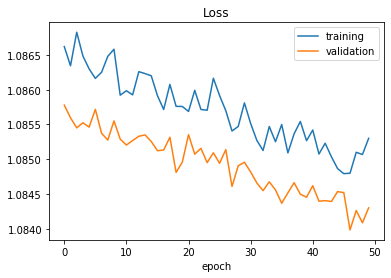

In [102]:
# plotting loss curves
plot_curves(history)

After adding regularization and dropout, there is a gap between the loss curves and both the loss curves fluctuate more. The train loss is more than the validation loss which could be due to the information loss caused by the dropout layer. Therefore, in the next incremental change, the dropout layer is removed and instead, the amount of regularization is increased. 

In [103]:
# saving the model
save_model(model, "model2")

Saved model to disk


In [105]:
# model architecture without dropout layer

tweet = Input(shape=(20, ), name = 'tweet')
embedding_layer_Tweet = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[glove],
                            trainable=True)(tweet)
BiLSTM_Tweet = Bidirectional(LSTM(64, kernel_regularizer=tensorflow.keras.regularizers.l2(0.1)))(embedding_layer_Tweet)

target = Input(shape=(20), name = 'target')
embedding_layer_Target = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[glove],
                            trainable=True)(target)
linear_softmax = Dense(128, activation='softmax')(embedding_layer_Target)

concat = Multiply()([BiLSTM_Tweet, linear_softmax])

LSTM_attention = LSTM(100, kernel_regularizer=tensorflow.keras.regularizers.l1(0.1))(concat)
output = Dense(3, activation='softmax')(LSTM_attention)

model = Model(inputs=[tweet, target], outputs= output)

print(model.summary())

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
tweet (InputLayer)              [(None, 20)]         0                                            
__________________________________________________________________________________________________
target (InputLayer)             [(None, 20)]         0                                            
__________________________________________________________________________________________________
embedding_29 (Embedding)        (None, 20, 100)      749000      tweet[0][0]                      
__________________________________________________________________________________________________
embedding_30 (Embedding)        (None, 20, 100)      749000      target[0][0]                     
____________________________________________________________________________________________

In [106]:
# training the model
history = stratifiedCV(model)

Training on fold 1/5...
Train on 2331 samples, validate on 583 samples
Epoch 1/50
2331/2331 [==============================] - 31s 13ms/sample - loss: 55.9235 - categorical_accuracy: 0.4702 - val_loss: 2.9727 - val_categorical_accuracy: 0.4786
Epoch 2/50
2331/2331 [==============================] - 5s 2ms/sample - loss: 2.3198 - categorical_accuracy: 0.4788 - val_loss: 2.0324 - val_categorical_accuracy: 0.4786
Epoch 3/50
2331/2331 [==============================] - 5s 2ms/sample - loss: 1.9346 - categorical_accuracy: 0.4788 - val_loss: 1.8298 - val_categorical_accuracy: 0.4786
Epoch 4/50
2331/2331 [==============================] - 5s 2ms/sample - loss: 1.7804 - categorical_accuracy: 0.4788 - val_loss: 1.7283 - val_categorical_accuracy: 0.4786
Epoch 5/50
2331/2331 [==============================] - 5s 2ms/sample - loss: 1.6882 - categorical_accuracy: 0.4788 - val_loss: 1.6527 - val_categorical_accuracy: 0.4786
Epoch 6/50
2331/2331 [==============================] - 5s 2ms/sample - loss

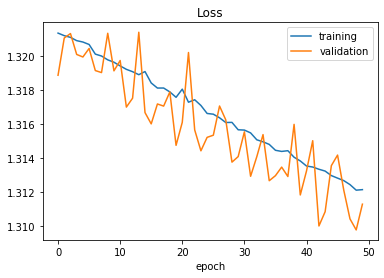

In [107]:
# plotting the curves
plot_curves(history)

The train curve is much smoother but the validation curve still fluctuates. Since the training curve is alright, the fluctuations in the validation curve could be due to low batch size. Therefore the learning rate is reduced further more and the batch size is increased.

In [108]:
# saving the model
save_model(model, "model3")

Saved model to disk


In [109]:
# changing the values of constants
INIT_LR = 0.00001
BATCH_SIZE = 64

In [110]:
# training the model
history = stratifiedCV(model)

Training on fold 1/5...
Train on 2331 samples, validate on 583 samples
Epoch 1/50
2331/2331 [==============================] - 10s 4ms/sample - loss: 1.3116 - categorical_accuracy: 0.4788 - val_loss: 1.3132 - val_categorical_accuracy: 0.4786
Epoch 2/50
2331/2331 [==============================] - 4s 2ms/sample - loss: 1.3115 - categorical_accuracy: 0.4788 - val_loss: 1.3118 - val_categorical_accuracy: 0.4786
Epoch 3/50
2331/2331 [==============================] - 5s 2ms/sample - loss: 1.3113 - categorical_accuracy: 0.4788 - val_loss: 1.3135 - val_categorical_accuracy: 0.4786
Epoch 4/50
2331/2331 [==============================] - 14s 6ms/sample - loss: 1.3114 - categorical_accuracy: 0.4788 - val_loss: 1.3112 - val_categorical_accuracy: 0.4786
Epoch 5/50
2331/2331 [==============================] - 20s 9ms/sample - loss: 1.3113 - categorical_accuracy: 0.4788 - val_loss: 1.3090 - val_categorical_accuracy: 0.4786
Epoch 6/50
2331/2331 [==============================] - 18s 8ms/sample - los

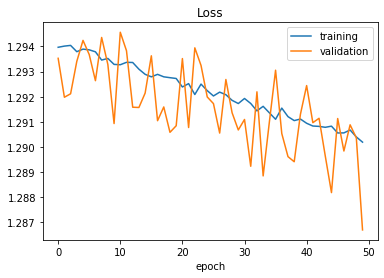

In [111]:
# plotting the loss curves
plot_curves(history)

In [112]:
# saving the model
save_model(model, "model4")

Saved model to disk


Despite changing the batch size and learning rate, the loss curves remain the same.


The loss curves did not seem to improve after multiple attempts of improving them by modifying the architecture and other hyperpraramter. Out of the trained model, model 2 is selected as the final model since the loss curves are better in terms of overfitting and extreme fluctuations. Even though the overall loss is less in the first model, it overfits which is not preferred since it will not perform the expected way to the test or unseen test data. Even though the overall loss is high and accuracy is low, we will know how the model would perform the way we expect it to. Therefore, model 2 is the final model which will be used for evaluations and independent evaluation.

### Evaluation, Analysis and Results

In [118]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# loading saved model from disk
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("model.h5")
print("Loaded model from disk")

# predicting model
y_pred = model.predict([X_test_Tweet, X_test_Target])

y_pred=np.argmax(y_pred,axis=1)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report') 
print(classification_report(y_test, y_pred))

Loaded model from disk
Confusion Matrix
[[715   0   0]
 [230   0   0]
 [304   0   0]]

Classification Report
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       715
           1       0.00      0.00      0.00       230
           2       0.00      0.00      0.00       304

    accuracy                           0.57      1249
   macro avg       0.19      0.33      0.24      1249
weighted avg       0.33      0.57      0.42      1249



/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The macro average F1 score of the model is 24%. The goal of this approach has not been achieved. The model predicts and classifies every stance as AGAINST and hence is estimated to perform the same way for the independent evaluation which is considered as the limitation of the model. The train-validation are not desirable therefore reducing the accuracy and the F1 score. Hence, the model cannot be used in the real world data due to its predictive/classification performance as well as the underlying assumption that all tweet text are of the same length. 


### Independent Evaluation
For the independent evaluation, the data was hand picked from the twitter website. There are five targets and three stances. To maintain balance among the classes, data pertaining to all the stances and targets were collected. Each tweet in the independent test data set was searched using each target on the website. For each target, at least one tweet belonging to each stance was selected and stored into a csv (comma separated values) file.
          

In [125]:
ie_data = pd.read_csv("ie_data.csv")
ie_data

,Tweet,Target,Stance
0,Pastor Who Said “Atheism Has Never Healed a Di...,Atheism,NONE
1,"""Atheism turns out to be too simple. If the wh...",Atheism,AGAINST
2,There will never be world peace until the crim...,Atheism,AGAINST
3,I wish I had people I could talk to more about...,Atheism,FAVOR
4,"""We're all just a collection of atoms, and not...",Atheism,FAVOR
5,God is just man's fear of the unknown being us...,Atheism,FAVOR
6,#metvmash Hawkeye: I don't believe in atheism.,Atheism,AGAINST
7,Eric Trump says his father ‘literally saved Ch...,Atheism,NONE
8,It’s going to take a lot of big-thinking and i...,Climate Change is a Real Concern,NONE
9,A new report shows that the world's top 1% is ...,Climate Change is a Real Concern,FAVOR


#### Preprocessing and Preparing

After the independent data set was generated, preprocessing is done in a similar manner to that of the training and test data set. Once the independent data is cleaned, the model is used to predict the stance of the collected data.

In [126]:
# preprocessing texts
for i in range(0,len(ie_data)):
    ie_data.iloc[i, 0] = preprocess_tweet(ie_data.iloc[i, 0])

In [127]:
# encoding class label
ie_data["Stance"] = ie_data["Stance"].apply(lambda x: encode[x])

In [128]:
# tokenizing and creating vocabulary
tokenizer_obj.fit_on_texts(ie_data['Tweet'])
sequences_Tweet = tokenizer_obj.texts_to_sequences(ie_data['Tweet'])
tokenizer_obj.fit_on_texts(ie_data['Target'])
sequences_Target = tokenizer_obj.texts_to_sequences(ie_data['Target'])

word_index = tokenizer_obj.word_index
print("unique tokens - "+str(len(word_index)))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab_size - '+str(vocab_size))

lines_pad_Tweet = pad_sequences(sequences_Tweet, padding='post', maxlen = 20)
lines_pad_Target = pad_sequences(sequences_Target, padding='post', maxlen = 20)
category_train =  ie_data['Stance'].values

unique tokens - 7540
vocab_size - 7541


In [129]:
# readying data for preduction
X_ie_Tweet = lines_pad_Tweet
X_ie_Target = lines_pad_Target
y_ie = category_train

#### Final Prediction

In [130]:
# Predicting with the independent Evaluation
y_pred = model.predict([X_ie_Tweet, X_ie_Target])

y_pred=np.argmax(y_pred,axis=1)

print('Confusion Matrix')
print(confusion_matrix(y_ie, y_pred))

print('\nClassification Report') 
print(classification_report(y_ie, y_pred))

Confusion Matrix
[[11  0  0]
 [14  0  0]
 [12  0  0]]

Classification Report
              precision    recall  f1-score   support

           0       0.30      1.00      0.46        11
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        12

    accuracy                           0.30        37
   macro avg       0.10      0.33      0.15        37
weighted avg       0.09      0.30      0.14        37



/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Just like estimated, the model classifies every instance of Tweet as a Tweet with a Stance Against the Target. 

### Ultimate Judgment
The model for the given train as well the independent data classifies all instance’s stance as AGAINST. The final model chosen is not a viable model that can be used in real world applications since it classifies every Tweet into the same Stance. More, probably minute, changes can be made in the model architecture and the hyperparameter settings to improve the model such that it can be used in a real-world setting with more reliability. 

To improve the performance the model, a different word embedding model can be chosen like the word2vec model or the GloVe with the Twitter corpus.  A possible reason for such overfitting and fluctuations in the curve could be the incorrect train-test split of the data. Furthermore, more simple or a complex model can be trained with minimal error during the preprocessing and preparing the data for train-validation and test data.
